TutorialAPI code examples
-------------------------
Here we find all code examples from
[https://rdm-software.pages.ufz.de/saqc/gettingstarted/TutorialAPI.html]()

In [26]:
import numpy as np
import pandas as pd
from saqc import SaQC

# we need some dummy data
values = np.array([12, 24, 36, 33, 89, 87, 45, 31, 18, 99])
dates = pd.date_range(start="2020-01-01", periods=len(values), freq="D")
data = pd.DataFrame({"a": values}, index=dates)
# let's insert some constant values ...
data.iloc[3:6] = values.mean()
# ... and an outlier
data.iloc[8] = 175

# initialize saqc
qc = SaQC(data=data, scheme="simple")

In [27]:
qc = qc.flagRange("a", min=19, max=80)

In [1]:
# execute some tests
qc = qc.flagConstants("a", thresh=0.1, window=4).flagByGrubbs("a", window=10).flagRange("a", min=20, max=80)

NameError: name 'qc' is not defined

In [29]:
qc.data

                a | 
================= | 
2020-01-01   12.0 | 
2020-01-02   24.0 | 
2020-01-03   36.0 | 
2020-01-04   47.4 | 
2020-01-05   47.4 | 
2020-01-06   47.4 | 
2020-01-07   45.0 | 
2020-01-08   31.0 | 
2020-01-09  175.0 | 
2020-01-10   99.0 | 

In [30]:
qc.flags

                    a | 
===================== | 
2020-01-01        BAD | 
2020-01-02  UNFLAGGED | 
2020-01-03  UNFLAGGED | 
2020-01-04  UNFLAGGED | 
2020-01-05  UNFLAGGED | 
2020-01-06  UNFLAGGED | 
2020-01-07  UNFLAGGED | 
2020-01-08  UNFLAGGED | 
2020-01-09        BAD | 
2020-01-10        BAD | 

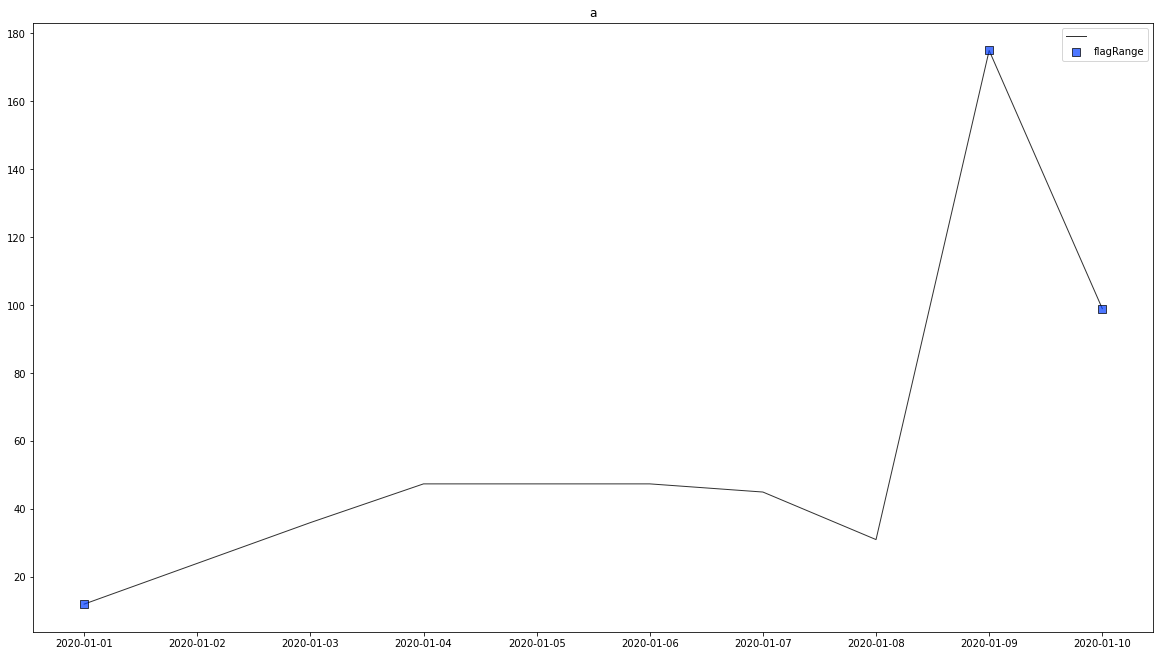

In [31]:
qc.plot("a")